# Contragolpe de fase

En esta página, cubriremos un comportamiento de puertas cuánticas controladas conocido como "retroceso de fase". Este interesante efecto cuántico es un bloque de construcción en muchos algoritmos cuánticos famosos, incluido el algoritmo de factorización de Shor y el algoritmo de búsqueda de Grover.

## vectores propios

Ya debería estar familiarizado con los vectores propios y los valores propios, pero si no, puede leer una buena introducción [aquí](https://www.khanacademy.org/math/linear-algebra/alternate-bases/eigen-everything/v/linear-algebra-introduction-to-eigenvalues-and-eigenvectors) . Si *está* familiarizado, entonces debería reconocer la ecuación del vector propio:

$$ \class{_matrix-A}{A}\class{_eig-vec-A}{|x\rangle} = \class{_eig-val-A}{\lambda}\class{_eig-vec-A} {|x\rango} $$

Esto es aún más simple en la computación cuántica. Dado que todos nuestros vectores de estado tienen una magnitud de 1, nuestros valores propios también deben tener una magnitud de 1, es decir, $\lambda = e^{2\pi i \theta}$. Entonces, para una puerta cuántica $U$ y su estado propio $|x\rangle$, tenemos:

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\ clase{_eig-vec-U}{|x\rangle} $$

Para resumir: si una puerta rota (y solo rota) todas las amplitudes de un vector de estado en la misma cantidad, entonces ese estado es un *estado* propio de esa puerta.

<!-- ::: q-block -->

### Explorando vectores propios

Use el widget a continuación para ver cómo una puerta de un solo qubit transforma un estado de un solo qubit. ¿Puedes averiguar qué estados son estados propios de qué compuertas?

```
q-eigenvector-widget
```

<!-- ::: -->

## Puertas controladas y estados propios

Una vez que se sienta cómodo con el concepto de estados propios, podemos comenzar a pensar en lo que sucede cuando controlamos estos circuitos en el estado de otro qubit. Por ejemplo, sabemos que la puerta Z que actúa sobre el estado $|1\rangle$ introduce una fase global negativa ($\theta = 0.5$), averigüemos qué sucede cuando controlamos esta operación.

<!-- ::: q-block.tabs -->

### La puerta Z controlada

<!-- ::: tab -->

### |10〉

<!-- ::: column(width=200) -->

Si el qubit de control es $|0\rangle$, entonces el comportamiento es trivial; no pasa nada.

<!-- ::: column(width=400) -->

![diagrama de circuito que muestra un registro de dos qubits en el estado 01, accionado por una puerta CZ. El estado no cambia](images/kickback/tabs/0/0.svg)

<!-- ::: -->

<!-- ::: tab -->

### |11〉

<!-- ::: column(width=200) -->

Si el qubit de control es $|1\rangle$, la puerta introduce una fase global (observe el signo menos en la imagen de la derecha), pero los estados del qubit no cambian.

<!-- ::: column(width=400) -->

![diagrama de circuito que muestra un registro de dos qubits en el estado 01, accionado por una puerta CZ. El estado no cambia](images/kickback/tabs/0/1.svg)

<!-- ::: -->

<!-- ::: tab -->

### |1+〉

<!-- ::: column(width=200) -->

La puerta Z controlada no hace nada cuando el control es $|0\rangle$, e introduce una fase negativa cuando el control es $|1\rangle$. Cuando el qubit de control está en superposición, la puerta cambia la fase *relativa* entre los estados $|0\rangle$ y $|1\rangle$ del qubit de control.

<!-- ::: column(width=400) -->

![diagrama de circuito que muestra un registro de dos qubits en el estado 01, accionado por una puerta CZ. El estado no cambia](images/kickback/tabs/0/2.svg)

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

Cuando el control es $|{+}\rangle$, y el objetivo es $|1\rangle$, la puerta Z controlada cambia el estado del qubit de *control* , pero deja el qubit de destino sin cambios. Este efecto se denomina "retroceso de fase", ya que el valor propio regresa al estado del qubit de control.

En términos más generales, si tenemos una puerta cuántica $U$ y su estado propio $|x\rangle$, entonces $U$ actuando sobre $|x\rangle$ agregará una fase global $\theta$ como vimos anteriormente.

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\ clase{_eig-vec-U}{|x\rangle} $$

Si controlamos la operación $U|x\rangle$ por otro qubit en una superposición de $|0\rangle$ y $|1\rangle$, entonces esto tendrá el efecto de rotar el qubit de control alrededor del eje Z por ángulo $\theta$. Es decir:

$$ \class{_matrix-CU}{CU}\class{_eig-vec-U}{|x\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\ rangle)} = \class{_eig-vec-U}{|x\rangle}\class{_control-qubit-post}{(\alpha|0\rangle + \beta e^{2\pi i \theta}| 1\ángulo)} $$

En el ejemplo anterior, vemos que el 'control' de la puerta Z controlada en realidad está haciendo una rotación Z; algo que solo debería haber estado observando el qubit en realidad lo ha cambiado. Por esta razón, a menudo verá la puerta Z controlada dibujada como dos controles.

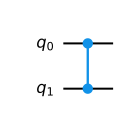

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.cz(0,1)
qc.draw()

## La puerta del CNOT

Veamos el efecto de contragolpe de fase con una puerta diferente de dos qubits. Dado que el estado $|{-}\rangle$ es un estado propio de la puerta X, con valor propio $-1$, obtenemos:

$$ \class{_matrix-CX}{CX}\class{_eig-vec-X}{|{-}\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta| 1\rangle)} = \class{_eig-vec-X}{|{-}\rangle}\class{_control-qubit-post}{(\alpha|0\rangle - \beta |1\rangle)} $ ps

![](images/kickback/cnot-kickback.svg)

Nuevamente, en este caso el cambio de fase $\theta = 0.5$, por lo que nuestro qubit de control se voltea alrededor del eje Z.

<!-- ::: q-block -->

### ejemplo resuelto

<summary>Contragolpe con la puerta CNOT (haga clic para ampliar)</summary>

```
q-carousel
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-0.svg"><br>By definition, the controlled-X gate (CNOT) flips the state of the target qubit (in our example, the rightmost bit is the target) if the control qubit is $|1\rangle$. In the image above, we show the CNOT gate transforming one state vector to another.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-1.svg"><br>For example, if the control qubit is in the state $|0\rangle$, then we always get the exact same statevector back. In the image above, the amplitudes of the states where the control is $|1\rangle$ are both zero, so we see no effect when we swap them.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-2.svg"><br>Another example: If the control qubit is in the state $|1\rangle$, then we do an X-gate on the target qubit. In this case, the target qubit is in an eigenstate of the X-gate, so we get the same statevector back, up to global phase. This change is a global phase, since the relative phase between the $|0\rangle$ and $|1\rangle$ amplitudes of the target qubit stayed the same.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-3.svg"><br>Let us look at the state vector when the control is in the state $|{+}\rangle$ (i.e. $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$), and the target in the state $|{-}\rangle$ (i.e. $\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$). We can see these two qubits are separable, as measuring one does not affect the state of the other.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-4.svg"><br> For example, regardless of whether we measure the control qubit as $|0\rangle$ or $|1\rangle$, the amplitudes for measuring the target as $|0\rangle$ or $|1\rangle$ stay the same.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-5.svg"><br>With all this in mind, let's see what happens when we apply the CNOT to this $|{+}{-}\rangle$ state.
        div.md
            <img src="images/kickback/carousel/cnot/carousel-img-6.svg"><br>After the CNOT, these qubits are still separable, as the state of one does not change when we measure the other. However, the relative phase between the $|0\rangle$ and $|1\rangle$ amplitudes of the control qubit has changed!
```




<!-- ::: -->

Cuando recordamos que la puerta H hace la transformación $|0\rangle \rightarrow |{+}\rangle$ y $|1\rangle \rightarrow |{-}\rangle$ (y viceversa), obtenemos lo siguiente identidad:

![](images/kickback/cnot-identity.svg)

## el problema de Deutsch

Acabamos de ver que condicionar una acción en el estado de un qubit en realidad puede cambiar el estado del qubit de control. Este es un efecto 'cuántico', es decir, algo que no vemos que suceda con los bits clásicos.

En la computación cuántica, queremos crear algoritmos que las computadoras clásicas *no puedan* ejecutar, por lo que un buen lugar para comenzar es tratar de replantear este efecto como un problema a resolver. De esta manera, podemos probar que las computadoras cuánticas son al menos un poco mejores en algo que las computadoras clásicas.

El problema de Deutsch hace exactamente esto. el de Deutsch es un problema de "caja negra"; un problema artificial en el que se nos permite aplicar una función a nuestros bits, pero no podemos ver cómo funciona la función. El desafío es descubrir algunas propiedades de la caja probando diferentes entradas y salidas.

El problema de Deutsch es el siguiente: tenemos una función reversible clásica (a la que llamaremos $f$ de forma abreviada), que actúa sobre dos bits, $a $ &amp; $b $. La función dejará el bit $ a $ solo, pero puede o no cambiar el bit $ b $. El problema de Deutsch nos pide que averigüemos si $f$ se comporta de manera diferente dependiendo del valor de $ a $ (lo llamaremos comportamiento "equilibrado"), o si ignora $ a $ y siempre hace lo mismo con $ b $ (comportamiento "constante"). El desafío es hacer esto aplicando $f$ la menor cantidad de veces posible.

![Imagen del problema de deutsch como un circuito cuántico. El circuito tiene dos bits, los cables superior e inferior etiquetados como 'a' y 'b' respectivamente. Luego, ambos bits son activados por una puerta opaca de dos bits etiquetada como 'f'. Después de 'f', el cable superior todavía tiene la etiqueta 'f', pero el cable inferior ahora tiene la etiqueta 'f (a, b)'.](images/kickback/deutsch-problem.svg)

El mejor algoritmo clásico para este problema aplica $f$ dos veces con diferentes valores de $ a $, luego observa si $f$ se comportó de manera diferente.

## algoritmo de Deutsch

Como habrás adivinado, podemos usar el retroceso de fase para crear un algoritmo cuántico que funciona incluso mejor que el algoritmo clásico. Si ponemos qubit $ a $ en el estado $|{+}\rangle$ y qubit $ b $ en el estado $|{-}\rangle$, entonces cualquier cambio condicionado a $ a $ devolverá un relativo negativo fase, volteando qubit $ a $ de $|{+}\rangle$ a $|{-}\rangle$. Luego podemos aplicar una compuerta H a $ a $ para ver si se produjo un contragolpe o no.

![Imagen del algoritmo de deutsch como circuito cuántico.](images/kickback/deutsch-algorithm.svg)

<!-- ::: q-block.reminder -->

### Más información


<summary>Dentro de la caja negra (haga clic para ampliar)</summary> Si esto todavía parece mágico, puede ayudar pensar en todas las posibles funciones de Deutsch y los circuitos cuánticos que las implementan. Hay cuatro posibles funciones de Deutsch: dos constantes y dos balanceadas.

Si es constante, la función puede no hacer nada o voltear qubit $ b $. Si está balanceada, la función puede voltear $ b $ solo cuando $ a $ es $|1\rangle$, o voltear $ b $ solo cuando $ a $ es $|0\rangle$. Puede ver los cuatro escenarios en la imagen a continuación.

<img src="images/kickback/deutsch-oracles.svg">

Con ambas funciones constantes, el qubit superior permanecerá sin cambios (ya que no le estamos haciendo nada), y en las funciones equilibradas, el efecto de retroceso cambia el qubit superior de $|{+}\rangle$ a $|{- }\ángulo$.




<!-- ::: -->

Este no es el ejemplo más impresionante de aceleración cuántica; es muy específico y no encontramos problemas de caja negra en la naturaleza. En cambio, el problema de Deutsch nos da un resultado alentador y algunos efectos interesantes para explorar. En el resto de este curso, ampliaremos este sencillo experimento para resolver problemas aún más impresionantes, incluida la factorización.

<!-- ::: q-block.exercise -->

### Ejercicio

Haz una función, `deutsch()` que tome una función Deutsch como `QuantumCircuit` y use el algoritmo Deutsch para resolverlo en un simulador cuántico. Su función debería devolver `True` si la función Deutsch está equilibrada y `False` si es constante.

Puede usar la función `deutsch_problem()` para crear un `QuantumCircuit` que puede usar como entrada para su función `deutsch()` .

<!-- ::: -->

In [ ]:
from qiskit import QuantumCircuit
import numpy as np

def deutsch_problem(seed=None):
    """Returns a circuit that carries out the function
    from Deutsch's problem.
    Args:
        seed (int): If set, then returned circuit will
            always be the same for the same seed.
    Returns: QuantumCircuit
    """
    np.random.seed(seed)
    problem = QuantumCircuit(2)
    if np.random.randint(2):
        print("Function is balanced.")
        problem.cx(0, 1)
    else:
        print("Function is constant.")
    if np.random.randint(2):
        problem.x(1)
    return problem

In [ ]:
def deutsch(function):
    """Implements Deutsch's algorithm.

    Args:
        function (QuantumCircuit): Deutsch function to solve.
            Must be a 2-qubit circuit, and either balanced,
            or constant.
    Returns:
        bool: True if the circuit is balanced, otherwise False.
    """

    # your code here

## Resumen

En esta página tenemos:

- recapituló el concepto de valores propios y vectores propios
- exploró el efecto de contragolpe de fase y cubrió algunos ejemplos específicos
- introdujo el problema de Deutsch como un escenario donde las computadoras cuánticas tienen una ventaja sobre las computadoras clásicas

Si olvida todo lo demás de esta página, lo más importante que debe recordar y sentirse cómodo es este resumen de la fase de contragolpe a continuación:

<!-- ::: q-block.reminder -->

### Recordatorio: contragolpe de fase

Si tenemos una puerta cuántica $U$ y su estado propio $|x\rangle$, entonces $U$ actuando sobre $|x\rangle$ agregará una fase global $\theta$. Es decir:

$$ \class{_matrix-U}{U}\class{_eig-vec-U}{|x\rangle} = \class{_eig-val-U}{e^{2\pi i \theta}}\ clase{_eig-vec-U}{|x\rangle} $$

Si controlamos la operación $U|x\rangle$ por otro qubit en una superposición de $|0\rangle$ y $|1\rangle$, entonces esto tendrá el efecto de rotar el qubit de control alrededor del eje Z por ángulo $\theta$. Es decir:

$$ \class{_matrix-CU}{CU}\class{_eig-vec-U}{|x\rangle}\class{_control-qubit-pre}{(\alpha|0\rangle + \beta|1\ rangle)} = \class{_eig-vec-U}{|x\rangle}\class{_control-qubit-post}{(\alpha|0\rangle + \beta e^{2\pi i \theta}| 1\ángulo)} $$

<!-- ::: -->